In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit

In [42]:
def func(t, u, gamma, beta):
    
    S, I, R = u
    
    dS = -beta*S*I
    dI = beta*S*I - gamma*I   
    dR = gamma*I
    
    return np.array([dS, dI, dR])

N = 763 # total number of students
days = np.arange(1, 15) # duration of outbreak
cases = np.array([3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5]) / N # cases (ratio)

S0 = 762/763
I0 = 1.0/763
R0 = 0.0

u0 = np.array([S0, I0, R0])
tspan = (1, 14)

def integrand(t, gamma, beta):
    sol = solve_ivp(func, tspan, u0, args=(gamma, beta), dense_output=True)
    return sol.sol(t)[1] # only return I(t)

fit = curve_fit(integrand, days, cases)[0]

KeyboardInterrupt: 

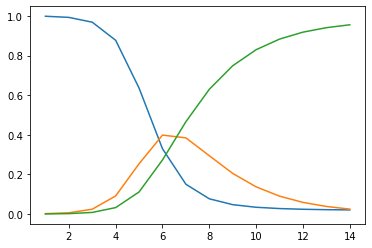

In [40]:
plt.plot(days, integrand(days, fit[0], fit[1]))

ValueError: x and y must have same first dimension, but have shapes (14,) and (1,)

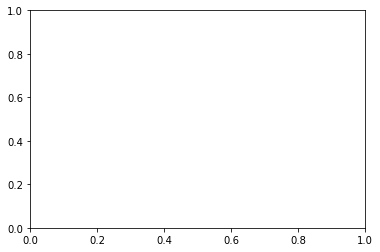

In [15]:
plt.plot(days, integrand(days, 0.48, 1.95))